# Glow-ViT results visualized

This is a script that's intended to visualize the performance of various Glow-ViT models evaluated on the low-light exposure datasets we currently have:

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

## Results:

> Glow-ViT

```
***** glow-vit | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     4.3495
  eval_samples_per_second     =     21.118
***** glow-vit | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.2021
  eval_samples_per_second     =     13.231
***** glow-vit | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =      0.176
  eval_samples_per_second     =     20.086
***** glow-vit | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =      0.351
  eval_samples_per_second     =     20.162
```

> Glow-ViT-dark

```
***** glow-vit-dark | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     0.4528
  eval_samples_per_second     =     19.035
***** glow-vit-dark | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.2992
  eval_samples_per_second     =     12.997
***** glow-vit-dark | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =     0.3231
  eval_samples_per_second     =     21.418
***** glow-vit-dark | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =     0.2702
  eval_samples_per_second     =     21.862
```

> Glow-ViT_illuminate

```
***** glow-vit-illuminate | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     2.2027
  eval_samples_per_second     =     19.711
***** glow-vit-illuminate | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.3929
  eval_samples_per_second     =     12.803
***** glow-vit-illuminate | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =     0.4334
  eval_samples_per_second     =     19.972
***** glow-vit-illuminate | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =     0.5756
  eval_samples_per_second     =     20.094
```


> Glow-ViT-mix

```
***** glow-vit-mix | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     0.1396
  eval_samples_per_second     =     21.091
***** glow-vit-mix | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.0776
  eval_samples_per_second     =     13.254
***** glow-vit-mix | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =     0.0707
  eval_samples_per_second     =     21.135
***** glow-vit-mix | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =     0.0472
  eval_samples_per_second     =     20.766
```

In [21]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["wildlife_very_dark_test", "wildlife_grayscale", "wildlife_less_saturated", "wildlife_underexposed"]
models = ["Glow-ViT", "Glow-ViT-dark", "Glow-ViT-illuminate", "Glow-ViT-mix"]
eval_loss = {
    "Glow-ViT": [4.3495, 0.2021, 0.176, 0.351],
    "Glow-ViT-dark": [0.4528, 0.2992, 0.3231, 0.2702],
    "Glow-ViT-illuminate": [2.2027, 0.3929, 0.4334, 0.5756],
    "Glow-ViT-mix": [0.1396, 0.0776, 0.0707, 0.0472]
}
eval_samples_per_second = {
    "Glow-ViT": [21.118, 13.231, 20.086, 20.162],
    "Glow-ViT-dark": [19.035, 12.997, 21.418, 21.862],
    "Glow-ViT-illuminate": [19.711, 12.803, 19.972, 20.094],
    "Glow-ViT-mix": [21.091, 13.254, 21.135, 20.766]
}

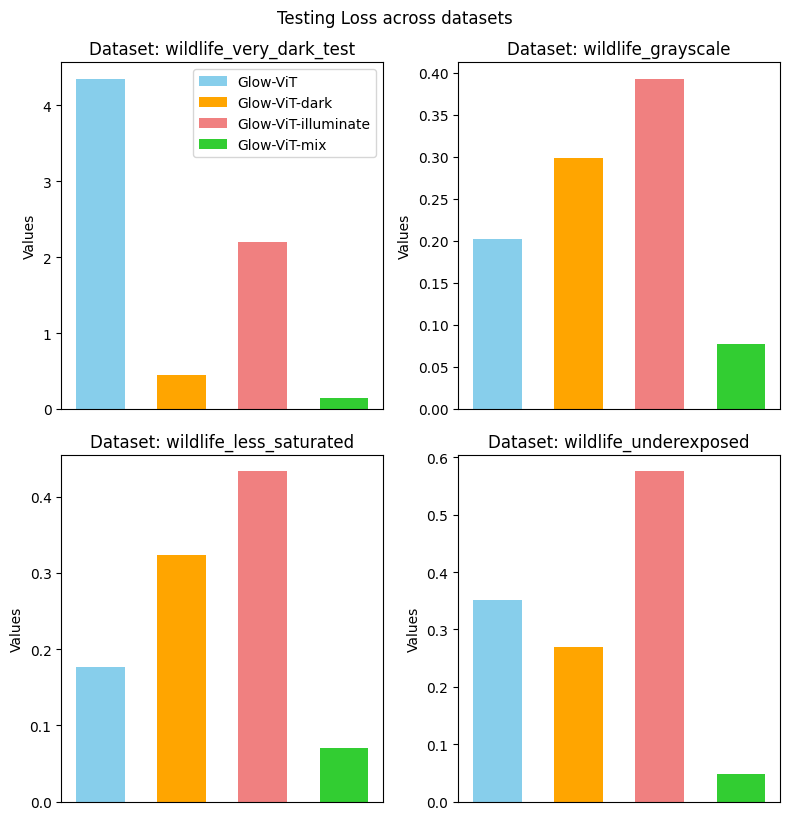

In [ ]:

x = np.arange(len(models))
width = 0.6  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_loss[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    ax.set_ylabel("Values")
    if i == 0:
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Testing Loss across datasets", fontsize=12, y=1.02)
plt.show()


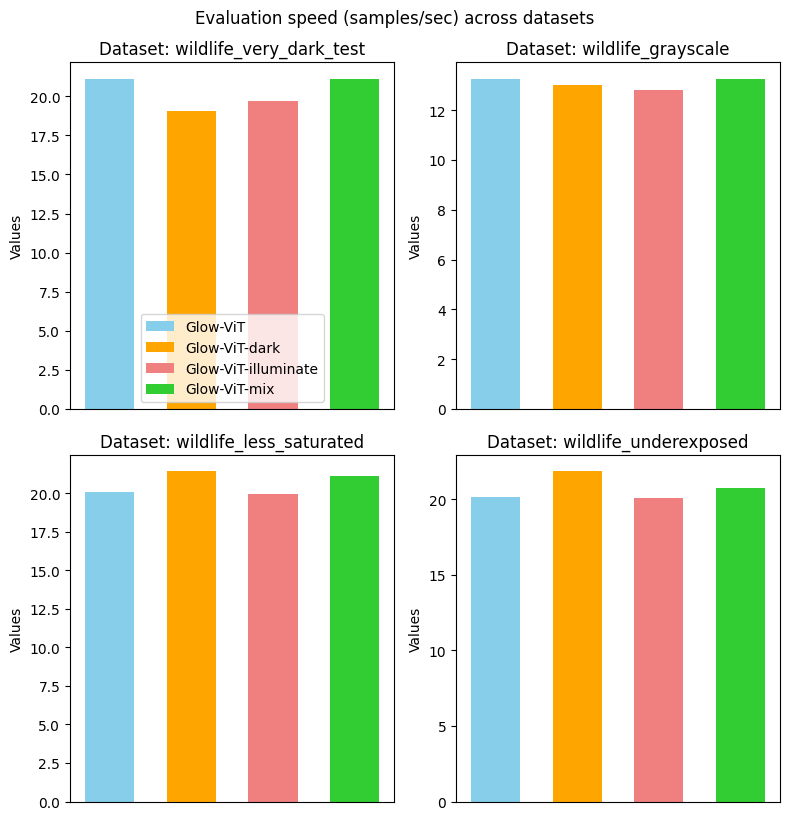

In [23]:

x = np.arange(len(models))
width = 0.6  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_samples_per_second[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    ax.set_ylabel("Values")
    if i == 0:
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Evaluation speed (samples/sec) across datasets", fontsize=12, y=1.02)
plt.show()
